# Lab 4: Zeri di funzione ed ottimizzazione

## **Recap funzioni Python**

In [2]:
def upper_text(text):  
    return text.upper()  

upper_text2 = lambda text: text.upper()  
  
stringa = "Hello world" 

# chiamata alle funzioni

print('upper_text: ', upper_text (stringa)) 
print('upper_text2: ', upper_text2 (stringa))

upper_text:  HELLO WORLD
upper_text2:  HELLO WORLD


In [3]:
def hello(func):  
    # storing the function in a variable  
    greeting = func("Greetings!")  
    print(greeting) 

hello(upper_text2)      

def hello2(func, text = "Hello world!"):  
    greeting = func(text)  
    print(greeting)

hello2(upper_text2, stringa)
hello2(upper_text2) 

GREETINGS!
HELLO WORLD
HELLO WORLD!


# **Esercizio 1**: Calcolare lo zero di una funzione
---

Scrivere una function che implementi il metodo delle approssimazioni successive per il calcolo dello zero di una funzione f(x) per $x\in \mathbb{R}^{n}$ prendendo come input una funzione per l'aggiornamento:
* $g(x)=x-f(x)e^{x/2}$
* $g(x)=x-f(x)e^{-x/2}$
* $g(x)=x-f(x)/f'(x)$

Testare il risolutore per risolvere $f(x) = e^x − x^2 = 0$, la cui soluzione è $x^∗ = −0.7034674$. In particolare:
* Disegnare il grafico della funzione $f$ nell’intervallo I = [−1,1] e verificare che $x^*$ sia lo zero di f in [-1, 1].
* Calcolare lo zero della funzione utilizzando entrambe le funzioni precedentemente scritte.
* Confrontare l'accuratezza delle soluzioni trovate e il numero di iterazioni effettuate dai solutori.
* Modificare le due funzioni in modo da calcolare l'errore $||x_k -x^*||_2$ ad ogni iterazione k-esima e graficare  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  i=0
  err=np.zeros(maxit+1, dtype=np.float64)
  err[0]=tolx+1
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  vecErrore[0] = np.abs(x0-xTrue)
  x=x0

  while (i<maxit and (err[i]>tolx or abs(f(x))>tolf) ): # scarto assoluto tra iterati
    x_new=g(x)
    err[i+1]=abs(x_new-x)
    vecErrore[i+1]=abs(x_new-xTrue)
    i=i+1
    x=x_new
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore) 

In [16]:
f = lambda x: np.exp(x)-x**2
df = lambda x: np.exp(x)-2*x

g1 = lambda x: x-f(x)*np.exp(x/2)
g2 = lambda x: x-f(x)*np.exp(-x/2)
g3 = lambda x: x-f(x)/df(x)

xTrue = -0.7034674
fTrue = f(xTrue)
print('fTrue = ', fTrue)

tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

fTrue =  4.278746923436216e-08


In [13]:
[sol_n, iter_n, err_n, vecErrore_g1]=succ_app(f, g1, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g1 \n x =',sol_n,'\n iter_new=', iter_n)

Metodo approssimazioni successive g1 
 x = -0.7034674225096886 
 iter_new= 23


In [14]:
[sol_n, iter_n, err_n, vecErrore_g2]=succ_app(f, g2, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g2 \n x =',sol_n,'\n iter_new=', iter_n)

Metodo approssimazioni successive g2 
 x = -0.48775858993453886 
 iter_new= 100


In [15]:
[sol_n, iter_n, err_n, vecErrore_g3]=succ_app(f, g3, tolf, tolx, maxit, xTrue, x0)
print('Metodo approssimazioni successive g3 \n x =',sol_n,'\n iter_new=', iter_n)

Metodo approssimazioni successive g3 
 x = -0.7034674224983917 
 iter_new= 6


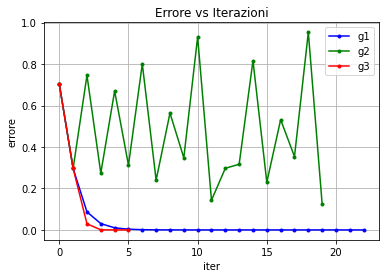

In [19]:
# GRAFICO Errore vs Iterazioni

# g1
plt.plot(vecErrore_g1, '.-', color='blue')
# g2
plt.plot(vecErrore_g2[:20], '.-', color='green')
# g3
plt.plot(vecErrore_g3, '.-', color='red')

plt.legend( ("g1", "g2", "g3"))
plt.xlabel('iter')
plt.ylabel('errore')
plt.title('Errore vs Iterazioni')
plt.grid()

# **Esercizio 2**: metodo del gradiente per l'ottimizzazione in $\mathbb{R}^2$
---
Scrivere una funzione che implementi il metodo del gradiente rispettivamente con step size $\alpha_k$ variabile, calcolato secondo la procedura di backtracking ad ogni iterazione k-esima.

Testare la function per minimizzare $f(x)$ definita come: 
$$f(x)=10(x-1)^2+(y-2)^2$$

In particolare:
* plotta la superficie $f(x)$ con 
${\tt plt.plot\_surface()}$ e le curve di livello con ${\tt plt.contour()}$.
* plotta, al variare delle iterazioni, la funzione obiettivo, l'errore e la norma del gradiente.

## **Superfici Python**

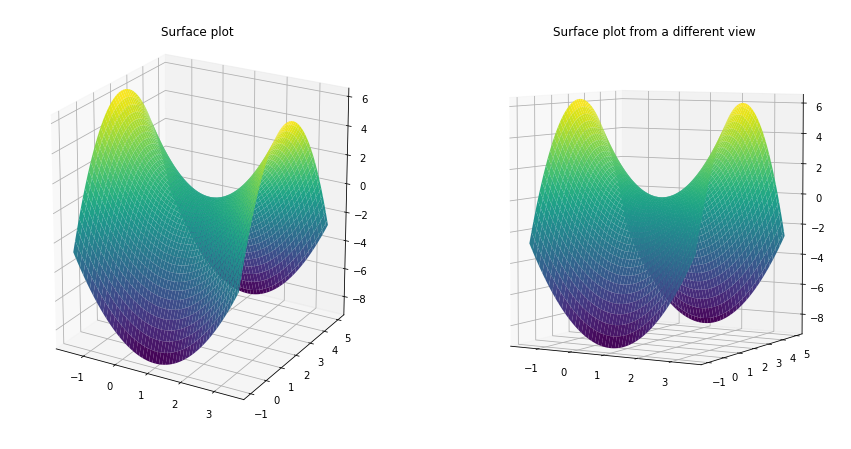

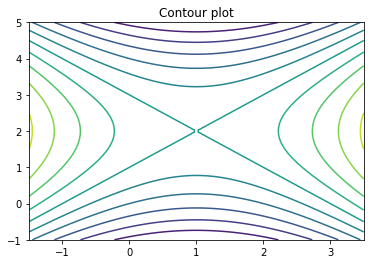

In [ ]:
def f(x,y):
    return (x-1)**2 - (y-2)**2


x = np.linspace(-1.5,3.5,100)
y = np.linspace(-1,5,100)
X, Y = np.meshgrid(x, y)
Z=f(X,Y)

plt.figure(figsize=(15, 8))

ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Surface plot')
ax1.view_init(elev=20)

ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_title('Surface plot from a different view')
ax2.view_init(elev=5)
plt.show()

#plt.figure(figsize=(8, 5))

contours = plt.contour(X, Y, Z, levels=10)
plt.title('Contour plot')
plt.show()

In [20]:
def next_step(x,grad): # backtracking procedure for the choice of the steplength
  alpha=1.1
  rho = 0.5
  c1 = 0.25
  p=-grad
  j=0
  jmax=10
  while ((f(x[0]+alpha*p[0],x[1]+alpha*p[1]) > f(x[0],x[1])+c1*alpha*grad.T@p) and j<jmax ):
    alpha= rho*alpha
    j+=1
  if (j>jmax):
    return -1
  else:
    #print('alpha=',alpha)
    return alpha

In [30]:
def minimize(x0,b,mode,step,MAXITERATION,ABSOLUTE_STOP): # funzione che implementa il metodo del gradiente
  #declare x_k and gradient_k vectors
  if mode=='plot_history':
    x=np.zeros((2,MAXITERATION))

  norm_grad_list=np.zeros((1,MAXITERATION))
  function_eval_list=np.zeros((1,MAXITERATION))
  error_list=np.zeros((1,MAXITERATION))
  
  #initialize first values
  x_last = np.array([x0[0],x0[1]])

  if mode=='plot_history':
    x[:,0] = x_last
  
  k=0

  function_eval_list[:,k]=f(x_last[0], x_last[1])
  error_list[:,k]=np.linalg.norm(x_last-b)
  norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))

  while (np.linalg.norm(grad_f(x_last))>ABSOLUTE_STOP and k < MAXITERATION ):
    k=k+1
    grad = grad_f(x_last)#direction is given by gradient of the last iteration

    # backtracking step
    step = next_step(x_last,grad)
    # Fixed step
    #step = 0.1
    
    if(step==-1):
      print('non convergente')
      return (iteration) #no convergence

    x_last=x_last-step*grad
    if mode=='plot_history':
      x[:,k] = x_last

    function_eval_list[:,k]=f(x_last[0], x_last[1])
    error_list[:,k]=np.linalg.norm(x_last-b)
    norm_grad_list[:,k]=np.linalg.norm(grad_f(x_last))

  function_eval_list = function_eval_list[:,:k+1]
  error_list = error_list[:,:k+1]
  norm_grad_list = norm_grad_list[:,:k+1]
  
  print('iterations=',k)
  print('last guess: x=(%f,%f)'%(x[0,k],x[1,k]))
 
  #plots
  if mode=='plot_history':
    v_x0 = np.linspace(-5,5,500)
    v_x1 = np.linspace(-5,5,500)
    x0v,x1v = np.meshgrid(v_x0,v_x1)
    z = f(x0v,x1v)
    
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(v_x0, v_x1, z,cmap='viridis')
    ax.set_title('Surface plot')
    plt.show()

    # plt.figure(figsize=(8, 5))
    contours = plt.contour(x0v, x1v, z, levels=100)
    plt.plot(x[0,0:k],x[1,0:k],'*')
    #plt.axis([-5,5,-5,5])
    plt.axis ('equal')
    plt.show()
  return (x_last,norm_grad_list, function_eval_list, error_list, k)

iterations= 60
last guess: x=(1.000000,1.999997)


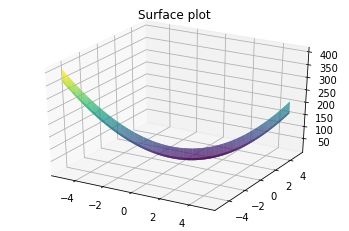

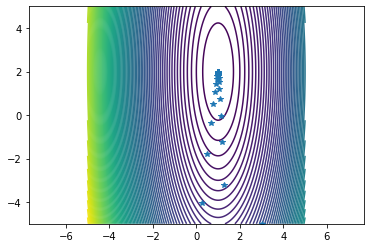

In [31]:
b=np.array([1,2])

def f(x1,x2):
  res = 10*(x1-b[0])**2 + (x2-b[1])**2 
  return res

def grad_f(x):
  return np.array([20*(x[0]-b[0]),2*(x[1]-b[1])])

step=0.1
MAXITERATIONS=1000
ABSOLUTE_STOP=1.e-5
mode='plot_history'
x0 = np.array((3,-5))
(x_last,norm_grad_list, function_eval_list, error_list, k)= minimize(x0, b,mode,step,MAXITERATIONS, ABSOLUTE_STOP)

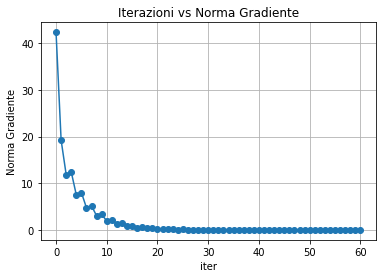

In [32]:
plt.plot(norm_grad_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Norma Gradiente')
plt.title('Iterazioni vs Norma Gradiente')
plt.grid()

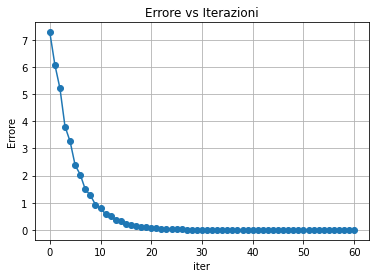

In [33]:
plt.plot(error_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Errore')
plt.title('Errore vs Iterazioni')
plt.grid()

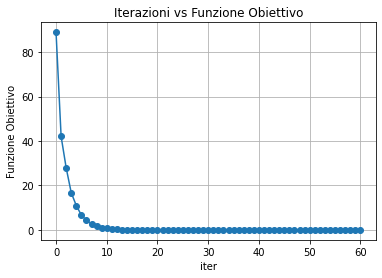

In [34]:
plt.plot(function_eval_list.T, 'o-')
plt.xlabel('iter')
plt.ylabel('Funzione Obiettivo')
plt.title('Iterazioni vs Funzione Obiettivo')
plt.grid()